<a href="https://colab.research.google.com/github/Nipun-Dew/South_German_Credit_analysis/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SouthGermanCredit.asc to SouthGermanCredit (1).asc


In [6]:
import numpy as np 
import pandas as pd 

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# read ascii dataset
df = pd.read_csv("SouthGermanCredit.asc" , delimiter=' ')

In [8]:
print(df.shape)
print(df.dtypes)

(1000, 21)
laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object


In [9]:
# view data
df.head(10)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,2,1,2,1


In [10]:
# old columns
germanCol = df.columns

# change column names
df.columns =  ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']

# new col names
engCol = df.columns

In [11]:
# # check the columns
# for i,data in enumerate(germanCol):
#     print(germanCol[i]+ " : "+ engCol[i])

In [12]:
# description about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


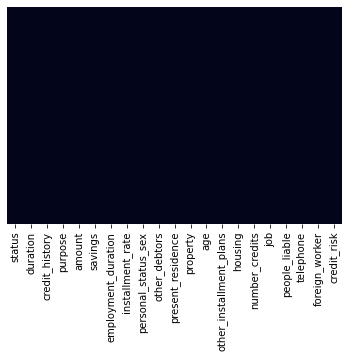

In [13]:
# plot missing values
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False,cbar=False)

In [14]:
df.info()
# no null fields are found in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [15]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [16]:
credit_risk = []
for i in df['credit_risk']:
  if i == 0:
    credit_risk.append('good risk')
  else:
    credit_risk.append('bad risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


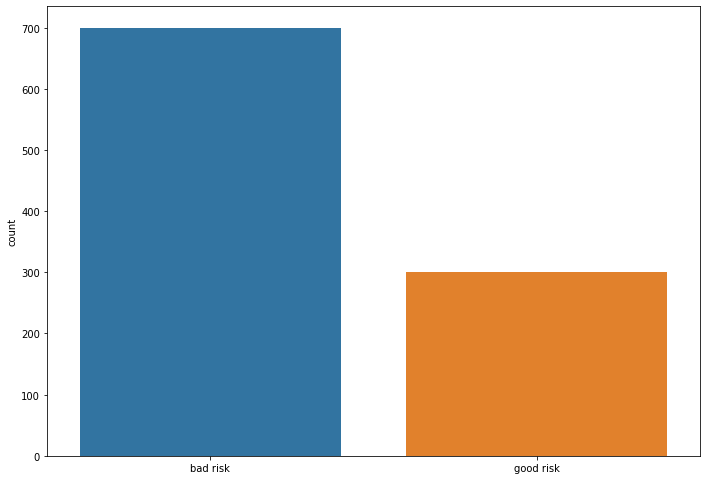

In [17]:
# credit risk threshold
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(credit_risk, ax=ax)

<Figure size 432x288 with 0 Axes>

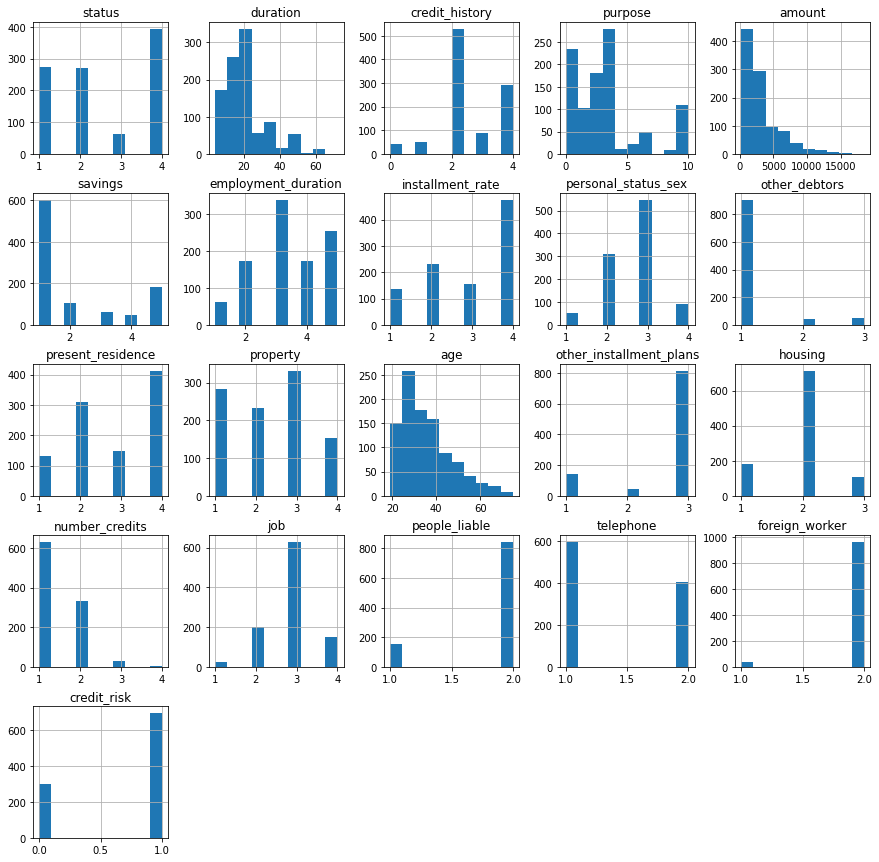

<Figure size 432x288 with 0 Axes>

In [18]:
# data visualization
# histogram
df.hist(figsize=(15,15))
plt.figure()

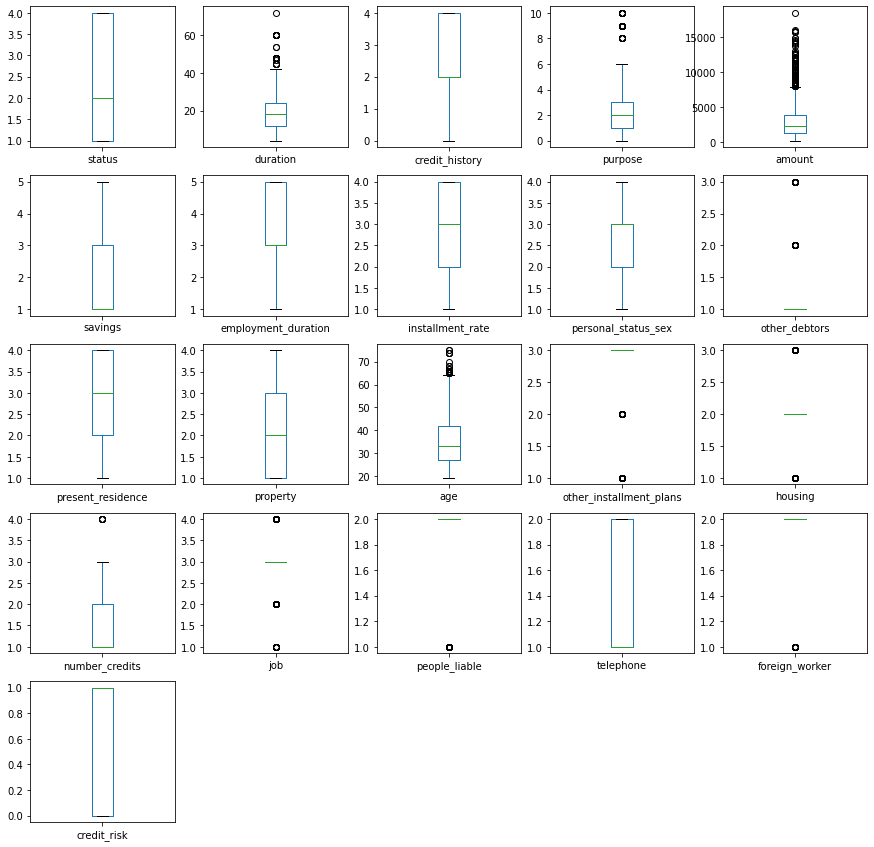

In [19]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),sharex=False,sharey=False)
plt.show()

**Relation between Categorical Attributes and Credit Risk**

credit_risk    0    1   All
status                     
1            135  139   274
2            105  164   269
3             14   49    63
4             46  348   394
All          300  700  1000
[[  82.2  191.8  274. ]
 [  80.7  188.3  269. ]
 [  18.9   44.1   63. ]
 [ 118.2  275.8  394. ]
 [ 300.   700.  1000. ]]
123.7209435162656
5.644860555592774e-23


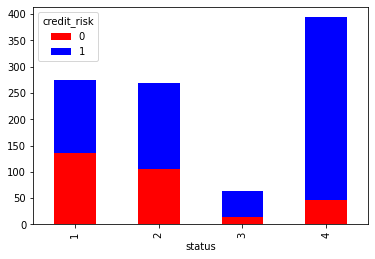

In [20]:
ct = pd.crosstab(df['status'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk       0    1   All
credit_history                
0                25   15    40
1                28   21    49
2               169  361   530
3                28   60    88
4                50  243   293
All             300  700  1000
[[  12.    28.    40. ]
 [  14.7   34.3   49. ]
 [ 159.   371.   530. ]
 [  26.4   61.6   88. ]
 [  87.9  205.1  293. ]
 [ 300.   700.  1000. ]]
61.6913969645955
1.7319995858582668e-09


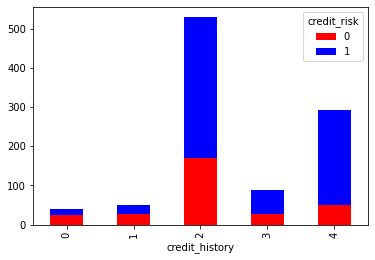

In [21]:
ct = pd.crosstab(df['credit_history'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk    0    1   All
purpose                    
0             89  145   234
1             17   86   103
2             58  123   181
3             62  218   280
4              4    8    12
5              8   14    22
6             22   28    50
8              1    8     9
9             34   63    97
10             5    7    12
All          300  700  1000
[[  70.2  163.8  234. ]
 [  30.9   72.1  103. ]
 [  54.3  126.7  181. ]
 [  84.   196.   280. ]
 [   3.6    8.4   12. ]
 [   6.6   15.4   22. ]
 [  15.    35.    50. ]
 [   2.7    6.3    9. ]
 [  29.1   67.9   97. ]
 [   3.6    8.4   12. ]
 [ 300.   700.  1000. ]]
33.35644686141815
0.03082229869752821


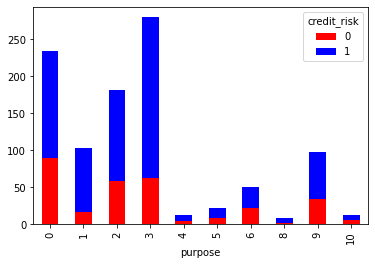

In [22]:
ct = pd.crosstab(df['purpose'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk            0    1   All
personal_status_sex                
1                     20   30    50
2                    109  201   310
3                    146  402   548
4                     25   67    92
All                  300  700  1000
[[  15.    35.    50. ]
 [  93.   217.   310. ]
 [ 164.4  383.6  548. ]
 [  27.6   64.4   92. ]
 [ 300.   700.  1000. ]]
9.60521395933605
0.29383465522899016


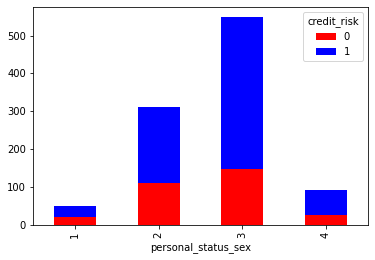

In [23]:
ct = pd.crosstab(df['personal_status_sex'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk          0    1   All
present_residence                
1                   36   94   130
2                   97  211   308
3                   43  106   149
4                  124  289   413
All                300  700  1000
[[  39.    91.   130. ]
 [  92.4  215.6  308. ]
 [  44.7  104.3  149. ]
 [ 123.9  289.1  413. ]
 [ 300.   700.  1000. ]]
0.7492964483880512
0.9993905365113295


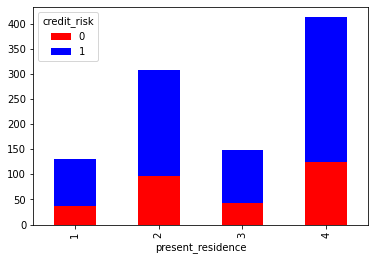

In [24]:
ct = pd.crosstab(df['present_residence'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk    0    1   All
job                        
1              7   15    22
2             56  144   200
3            186  444   630
4             51   97   148
All          300  700  1000
[[   6.6   15.4   22. ]
 [  60.   140.   200. ]
 [ 189.   441.   630. ]
 [  44.4  103.6  148. ]
 [ 300.   700.  1000. ]]
1.8851560280131705
0.9843324501309928


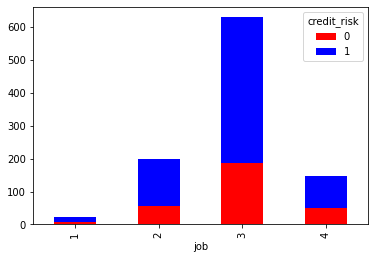

In [25]:
ct = pd.crosstab(df['job'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk       0    1   All
foreign_worker                
1                 4   33    37
2               296  667   963
All             300  700  1000
[[  11.1   25.9   37. ]
 [ 288.9  674.1  963. ]
 [ 300.   700.  1000. ]]
6.737044120221693
0.15045408723319523


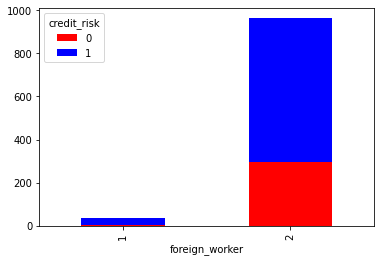

In [26]:
ct = pd.crosstab(df['foreign_worker'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

credit_risk    0    1   All
housing                    
1             70  109   179
2            186  528   714
3             44   63   107
All          300  700  1000
[[  53.7  125.3  179. ]
 [ 214.2  499.8  714. ]
 [  32.1   74.9  107. ]
 [ 300.   700.  1000. ]]
18.67400539289489
0.00475112001741073


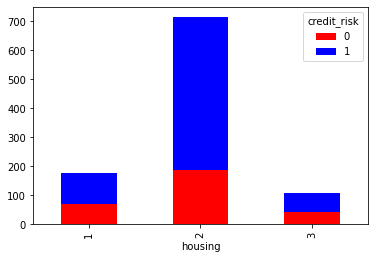

In [27]:
ct = pd.crosstab(df['housing'], df['credit_risk'], margins=True)

import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
print(ct)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(ct)
print(expected)
print(stat)
print(p) 

**Relation between Continous data and Credit risk**

52.94166215102227
1.4773704588284736e-292


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


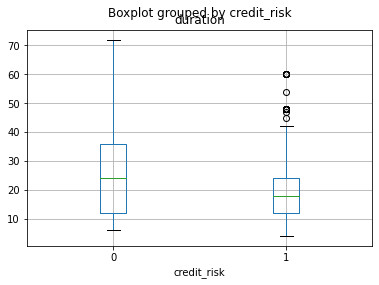

In [28]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='duration', by='credit_risk')

t_statistic, p_value = ttest_ind(df['duration'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


36.63935627433329
5.603744450377375e-187


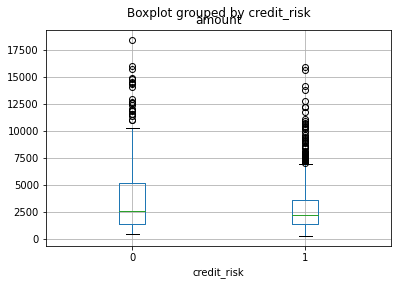

In [29]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='amount', by='credit_risk')

t_statistic, p_value = ttest_ind(df['amount'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

56.754703396984716
0.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


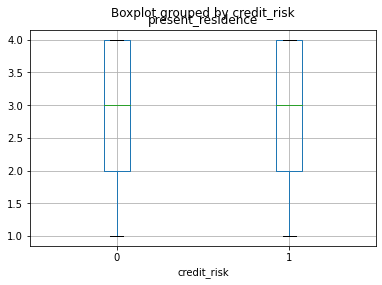

In [30]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='present_residence', by='credit_risk')

t_statistic, p_value = ttest_ind(df['present_residence'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


59.45186043308814
0.0


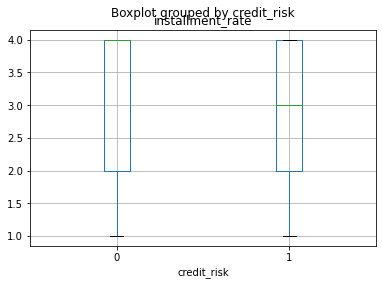

In [31]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='installment_rate', by='credit_risk')

t_statistic, p_value = ttest_ind(df['installment_rate'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


96.97307688937167
0.0


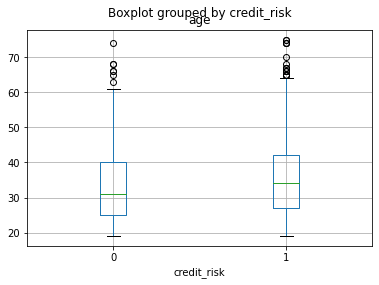

In [32]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='age', by='credit_risk')

t_statistic, p_value = ttest_ind(df['age'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


61.97648788228987
0.0


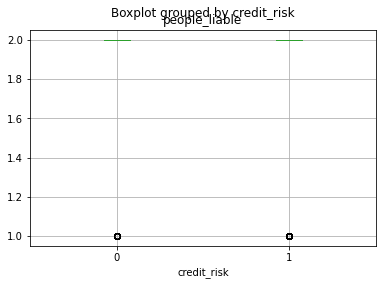

In [33]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

df.boxplot(column='people_liable', by='credit_risk')

t_statistic, p_value = ttest_ind(df['people_liable'], df['credit_risk'], equal_var=False)
print(t_statistic)
print(p_value)

**Corelation between each attribute (box graphs)**

In [34]:
foreign_worker = []
for i in df['foreign_worker']:
  if i == 1:
    foreign_worker.append('foreign')
  else:
    foreign_worker.append('local')

In [35]:
purpose = []
for i in df['purpose']:
  if i == 0:
    purpose.append('others')
  elif i == 1:
    purpose.append('car')
  elif i == 2:
    purpose.append('car(old)')
  elif i == 3:
    purpose.append('furniture/equip')
  elif i == 4:
    purpose.append('radio/tv')
  elif i == 5:
    purpose.append('appliances')
  elif i == 6:
    purpose.append('repairs')
  elif i == 7:
    purpose.append('education')
  elif i == 8:
    purpose.append('vacation')
  elif i == 9:
    purpose.append('retraning')
  else:
    purpose.append('business')



In [36]:
job = []
for i in df['job']:
  if i == 1:
    job.append('unemployed/non resident')
  elif i == 2:
    job.append('unskilled/resident')
  elif i == 3:
    job.append('employee')
  elif i == 4:
    job.append('manager')


In [37]:
housing = []
for i in df['housing']:
  if i == 1:
    housing.append('for free')
  elif i == 2:
    housing.append('rent')
  elif i == 3:
    housing.append('own')

In [38]:
status = []
for i in df['status']:
  if i == 1:
    status.append('no acc')
  elif i == 2:
    status.append('<0 DM')
  elif i == 3:
    status.append('<200 DM')
  elif i == 4:
    status.append('>=200 DM')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of Account status with Credit Risk ')

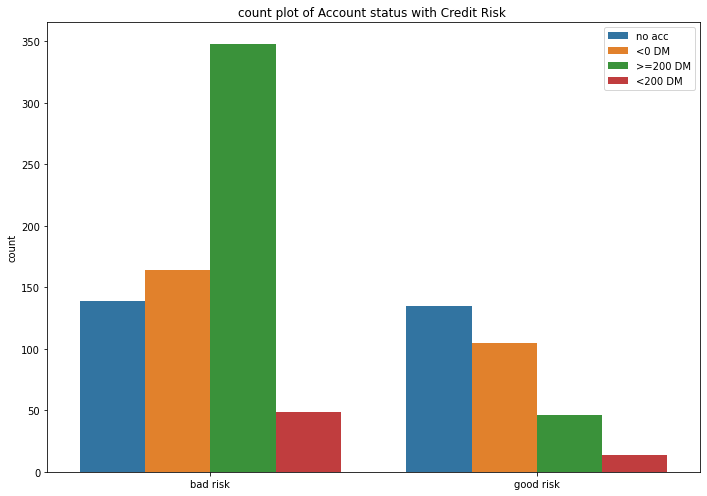

In [39]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(credit_risk,hue=status, ax=ax)
plt.title('count plot of Account status with Credit Risk ')

In [40]:
amount = []
for i in df['amount']:
  if i < 1000:
    amount.append('<1000')
  elif i < 2000:
    amount.append('<2000')
  elif i < 3000:
    amount.append('<3000')
  elif i < 4000:
    amount.append('<4000')
  else:
    amount.append('>4000')

In [41]:
len(amount)

1000

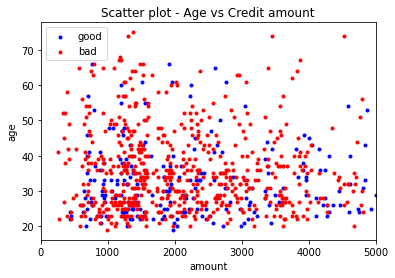

In [42]:
good_age = []
bad_age = []
good_amount = []
bad_amount = []

for i in range(0,1000):
  if df['credit_risk'][i] == 0:
    good_age.append(df['age'][i])
    good_amount.append(df['amount'][i])
  else:
    bad_age.append(df['age'][i])
    bad_amount.append(df['amount'][i])


plt.scatter(good_amount, good_age, color='blue', marker='.', label='good')
plt.scatter(bad_amount, bad_age, color='red', marker='.', label='bad')
plt.title('Scatter plot - Age vs Credit amount')
plt.ylabel('age')
plt.xlabel('amount')
plt.xlim(0,5000)
plt.legend(loc='upper left')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of credit amount with credit risk')

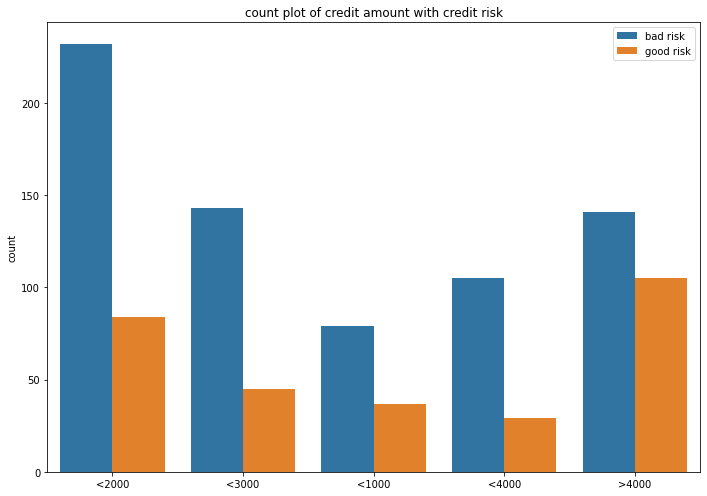

In [43]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(amount,hue=credit_risk, ax=ax)
plt.title('count plot of credit amount with credit risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of Housing details with Credit Risk')

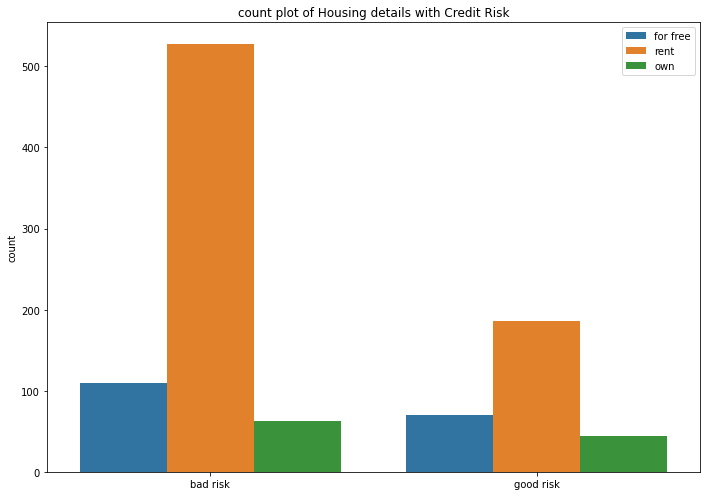

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(credit_risk,hue=housing, ax=ax)
plt.title('count plot of Housing details with Credit Risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of Employement details with Credit Risk')

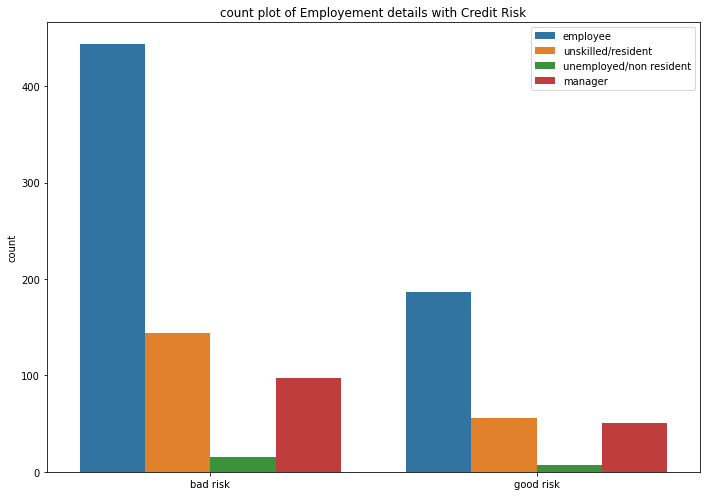

In [45]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(credit_risk,hue=job, ax=ax)
plt.title('count plot of Employement details with Credit Risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of Credit Purpose with Credit Risk')

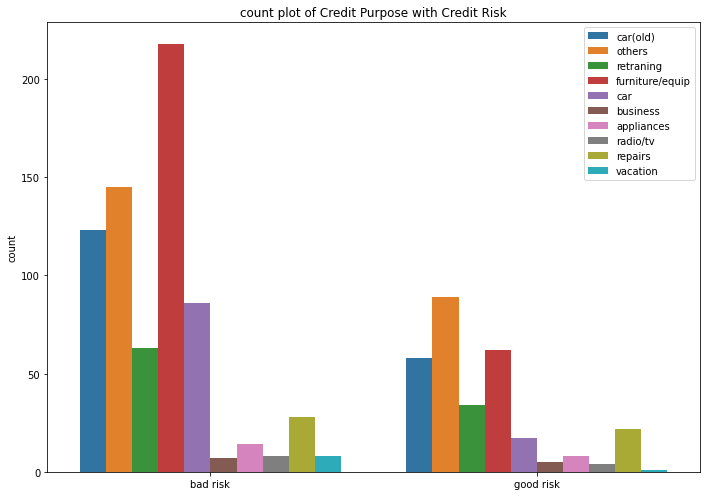

In [46]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(credit_risk,hue=purpose, ax=ax)
plt.title('count plot of Credit Purpose with Credit Risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count plot of Foreign worker details with Credit Risk')

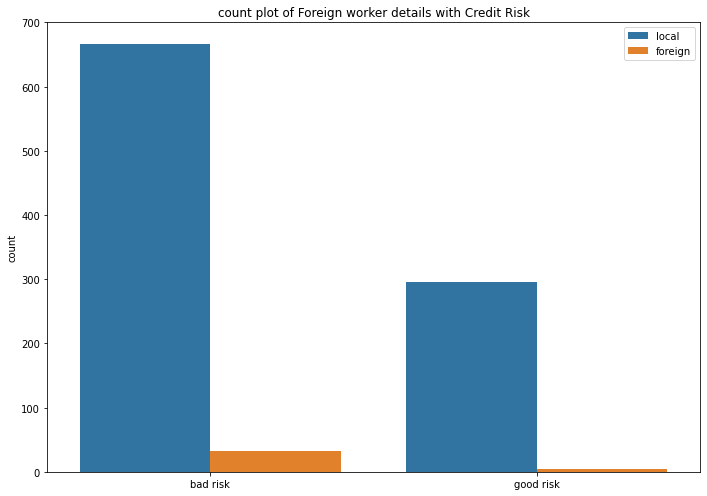

In [47]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(credit_risk,hue=foreign_worker)
plt.title('count plot of Foreign worker details with Credit Risk')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


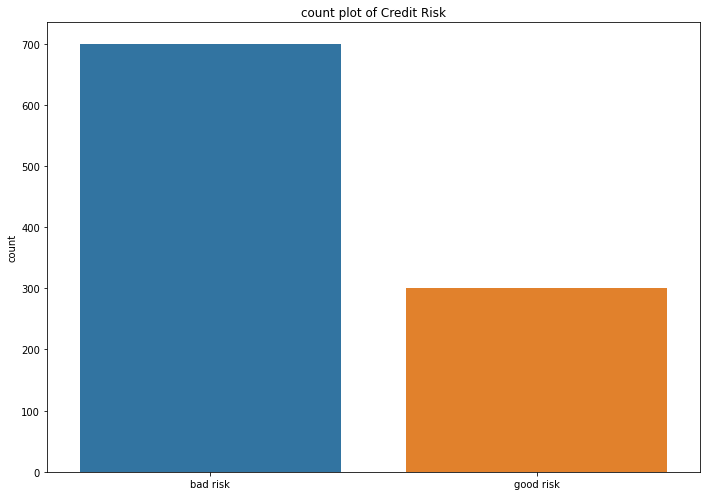

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title('count plot of Credit Risk')
sns.countplot(credit_risk)

Text(0.5, 1.0, 'Correlation of Credit Risk with other fields')

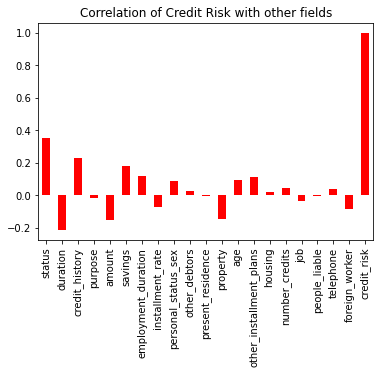

In [49]:
cor = df.corr(method='pearson')
corvals = cor['credit_risk'].values

cor.iloc[20].plot(kind="bar",color='red')
plt.title('Correlation of Credit Risk with other fields')

**Train the Model**

In [50]:
x = df.iloc[:,0:20]
y = df.iloc[:,20]
x

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2


**Module Training Pipeline**

In [51]:
# split dataset into 75% as training data and 25% present as the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [52]:
# importing all required libraries
import os
import pandas
import numpy
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
# evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))

In [55]:
# find the best model
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.749333 (0.037618)
LDA: 0.750667 (0.044242)
KNN: 0.694667 (0.045976)
CART: 0.666667 (0.041740)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.718667 (0.044402)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.741333 (0.033307)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.758667 (0.055442)


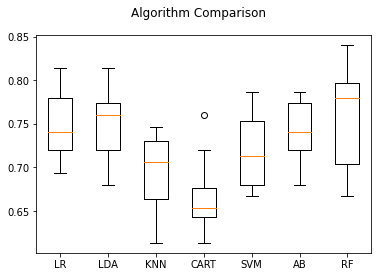

In [56]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Hyper Parameter selection using Random Forest**

In [59]:
# running Random Forest for variable selection

classifier = RandomForestClassifier(random_state=0)

#random forest
#Grid search for parameter selection

grid_param = {
    'n_estimators': [100,300],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto',2,4,6,10],
}

In [60]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(
    estimator=classifier,
    param_grid=grid_param,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [61]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [62]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300}


In [63]:
rf = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=100, max_features=4)
#fit the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
predictions = rf.predict(X_train)
print(accuracy_score(y_train, predictions))
print(classification_report(y_train, predictions))
print(confusion_matrix(y_train, predictions))
predictions1 = rf.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(classification_report(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       533

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

[[217   0]
 [  0 533]]
0.752
              precision    recall  f1-score   support

           0       0.72      0.41      0.52        83
           1       0.76      0.92      0.83       167

    accuracy                           0.75       250
   macro avg       0.74      0.67      0.68       250
weighted avg       0.75      0.75      0.73       250

[[ 34  49]
 [ 13 154]]


In [65]:
rf.feature_importances_

array([0.1082417 , 0.09867585, 0.04980804, 0.06204812, 0.13652158,
       0.04646603, 0.05302361, 0.04620787, 0.03702099, 0.01966364,
       0.04476154, 0.04634526, 0.11170699, 0.02336979, 0.02557145,
       0.01852041, 0.02895534, 0.01464794, 0.0221944 , 0.00624944])

In [66]:
x.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [67]:
x.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')

In [68]:
feature_columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker']

In [71]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=feature_columns, columns=['importance']).sort_values(by=['importance'], ascending=False)
feature_importances

,importance
amount,0.136522
age,0.111707
status,0.108242
duration,0.098676
purpose,0.062048
employment_duration,0.053024
credit_history,0.049808
savings,0.046466
property,0.046345
installment_rate,0.046208


**Choosing Hyper Parameters, Train a model using Logistic Regression**

In [89]:
# selecting required attributes
cols = [col for col in x .columns if col in ['amount','age','status','duration','purpose','employment_duration','credit_history','savings','property','installment_rate','present_residence']]
dataset1 = x[cols]
y = df.iloc[:,-1:]

In [90]:
dataset1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,present_residence,property,age
0,1,18,4,2,1049,1,2,4,4,2,21
1,1,9,4,0,2799,1,3,2,2,1,36
2,2,12,2,9,841,2,4,2,4,1,23
3,1,12,4,0,2122,1,3,3,2,1,39
4,1,12,4,0,2171,1,3,4,4,2,38
...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,4,1,21
996,1,24,2,0,2303,1,5,4,1,1,45
997,4,21,4,0,12680,5,5,4,4,4,30
998,2,12,2,3,6468,5,1,2,1,4,52


In [91]:
X_train, X_test, y_train, y_test = train_test_split(dataset1, y, test_size=0.25, random_state=0)

In [95]:
# Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# estimate accuracy on validation dataset
predictions = classifier.predict(X_train)
print("Accuracy for training data",accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))

# estimate accuracy on validation dataset
predictions1 = classifier.predict(X_test)
print("Accuracy for test data", accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))



Accuracy for training data 0.7586666666666667
[[ 93 124]
 [ 57 476]]
Accuracy for test data 0.756
[[ 35  48]
 [ 13 154]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
